<a href="https://colab.research.google.com/github/DionKimmm/2019_Summer_DL_Prof_Seok/blob/master/190722_Ver1_Simple_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

## 필요한 라이브러리 불러오기

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

## 데이터 불러오기 & 하이퍼파라미터 정의

In [2]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

learning_rate = 0.01 
learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망 레이어 구성 옵션
n_hidden = 256 # 히든 레이어의 뉴런 갯수
n_input = 28*28 # 입력값 크기 - 이미지 픽셀수

W0722 04:51:29.703017 140170800478080 deprecation.py:323] From <ipython-input-2-69b7de2b9578>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0722 04:51:29.706792 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0722 04:51:29.708762 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0722 04:51:29.989970 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0722 04:51:29.993360 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0722 04:51:30.050560 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 오토인코더 신경망 모델 구성

In [0]:
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b), 인코더 레이어 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특 성을 뽑아내고, 
#decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과  똑같은 아웃풋을 만들어 
#내도록 합니다. 히든 레이어의 구성과 특성치을 뽑아내 는 알고리즘을 변경하여 다양한 
#오토인코더를 만들 수 있다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

# 디코더 레이어 구성, 이 디코더가 최종 모델
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

## 손실함수 정의 및 최적화 

In [4]:
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 # 위해 입력 값인 X 값을 평가를 # 위한 실측 결과 값으로하여 decoder 와의 차이 # 를 손실값으로 설정

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


W0722 04:51:30.364691 140170800478080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0722 04:51:30.417290 140170800478080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 훈련 데이터를 오토인코더 신경망 모델 학습

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
      total_cost = 0
      for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
      print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')


Epoch: 0001 Avg. cost = 0.2014
Epoch: 0002 Avg. cost = 0.0630
Epoch: 0003 Avg. cost = 0.0518
Epoch: 0004 Avg. cost = 0.0471
Epoch: 0005 Avg. cost = 0.0439
Epoch: 0006 Avg. cost = 0.0418
Epoch: 0007 Avg. cost = 0.0374
Epoch: 0008 Avg. cost = 0.0352
Epoch: 0009 Avg. cost = 0.0344
Epoch: 0010 Avg. cost = 0.0340
Epoch: 0011 Avg. cost = 0.0337
Epoch: 0012 Avg. cost = 0.0331
Epoch: 0013 Avg. cost = 0.0321
Epoch: 0014 Avg. cost = 0.0315
Epoch: 0015 Avg. cost = 0.0299
Epoch: 0016 Avg. cost = 0.0298
Epoch: 0017 Avg. cost = 0.0296
Epoch: 0018 Avg. cost = 0.0294
Epoch: 0019 Avg. cost = 0.0293
Epoch: 0020 Avg. cost = 0.0286
최적화 완료!


## 합성 결과 확인

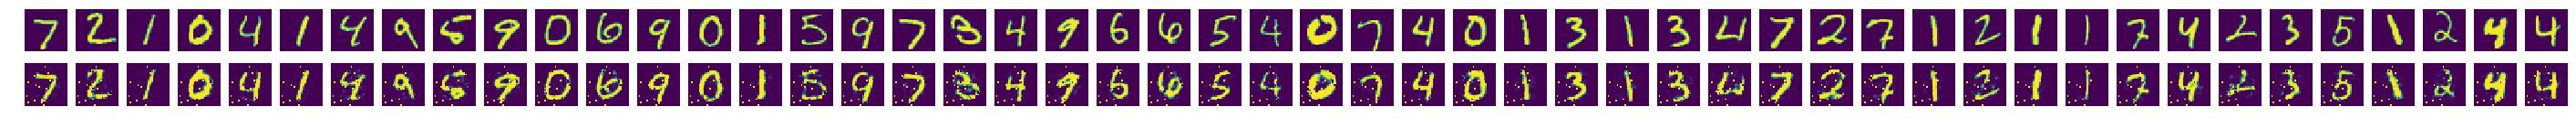

In [6]:

# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
     ax[0][i].set_axis_off()
     ax[1][i].set_axis_off()
     ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
     ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()


In [7]:
!nvidia-smi

Mon Jul 22 04:52:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    78W / 149W |    167MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  